In [28]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle as pkl


## **Introduccíon**

En este proyecto se va a desarrollar una exploración y limpieza de datos de una tabla que contiene variables sobre clientes de un banco, después se desarrollara un modelo que busca clasificar a los individuos por la categorización dada por la variable “Atrition_Flag” la cual indica si un usuario tiene una cuenta activa (Existing Customer) o una desactivada (Attrited Customer)

## **Exploracíon Inicial de los Datos**

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/labeconometria/MLxE/main/proyectos1er/dataset_2.csv')

In [30]:
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [31]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [33]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

**Se seleccionan las variables relevantes para el modelo y se transforman los datos tipo objeto a categoria**

In [34]:
df = df[['Attrition_Flag', 'Customer_Age', 'Gender','Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book','Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

var_objetos = df.select_dtypes(include='object').columns

for columna in var_objetos:
  df[columna] = df[columna].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## **Limpieza de Datos**

### **Missing values**  
(Se van a eliminar missing values, sib embargo en la exploracion inicial ya se identifico que no hay missing values)

In [35]:
df = df.dropna()

## **Valores Duplicados**

**Duplicados Explicitos**

In [36]:
print(f'Dimensiones de la tabla antes de eliminar duplicados explicitos ---> {df.shape}')
df.drop_duplicates()
print(f'Dimensiones de la tabla despues de eliminar duplicados explicitos --> {df.shape}')

Dimensiones de la tabla antes de eliminar duplicados explicitos ---> (10127, 20)
Dimensiones de la tabla despues de eliminar duplicados explicitos --> (10127, 20)


**Duplicados Implicitos**

In [37]:
columnas = df.columns

for columna in columnas[:-2]: # se omiten las ultimas dos porque son variables con muchos valores numericos pero sin duplicados
  print(columna)
  print(df[columna].unique())
  print('________________________________________________')



Attrition_Flag
['Existing Customer', 'Attrited Customer']
Categories (2, object): ['Attrited Customer', 'Existing Customer']
________________________________________________
Customer_Age
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
________________________________________________
Gender
['M', 'F']
Categories (2, object): ['F', 'M']
________________________________________________
Dependent_count
[3 5 4 2 0 1]
________________________________________________
Education_Level
['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate']
Categories (7, object): ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
                         'Uneducated', 'Unknown']
________________________________________________
Marital_Status
['Married', 'Single', 'Unknown', 'Divorced']
Categories (4, object): ['Divorced', 'Married', 'Single', 'Unknown']
______________

## **Analisis Descriptico y Grafico**

**Estadisticos Descriptivos Variables Numericas**

In [38]:
df.select_dtypes(exclude='category').describe().round(2)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27
std,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28
min,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02
50%,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18
75%,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50
max,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00


**Estadisticos Descriptivos Variables categoricas**

In [39]:
df.select_dtypes(include='category').describe()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


**Grafico de correlacion de las varaibles numericas**

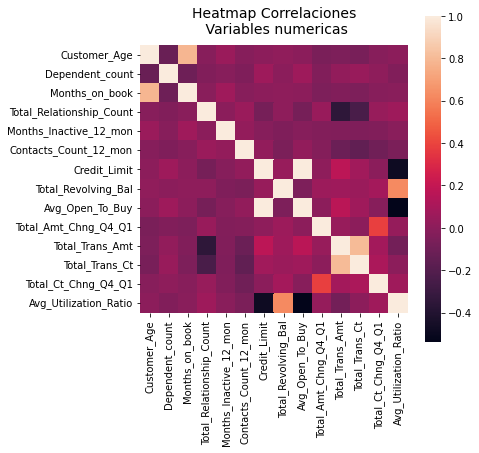

In [40]:
fig = plt.figure(figsize=(6,6))
plt.title('Heatmap Correlaciones\n Variables numericas',fontsize=14,y=1.02)
sns.heatmap(df.select_dtypes(exclude='category').corr(),square=True)
plt.show()

**Histogramas Varialbes Numericas Categorizadas por Genero**

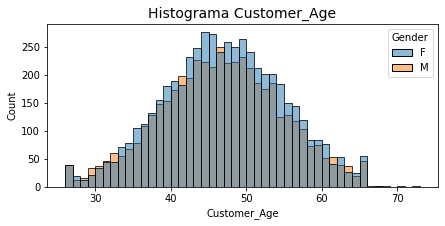

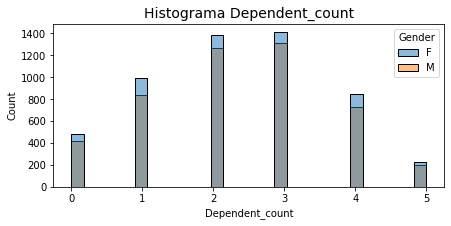

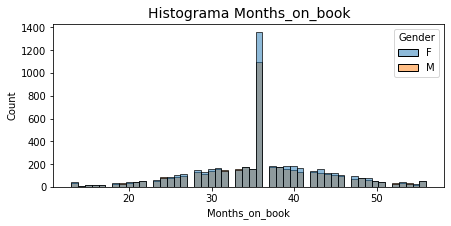

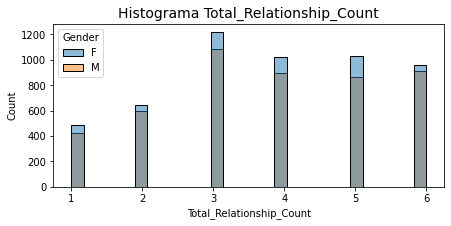

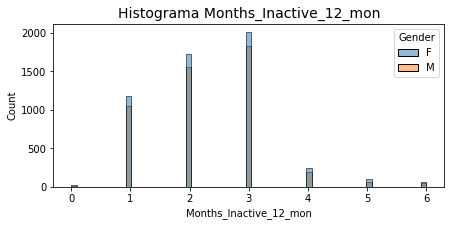

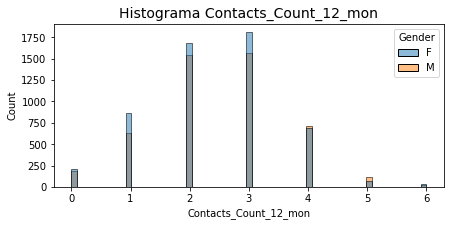

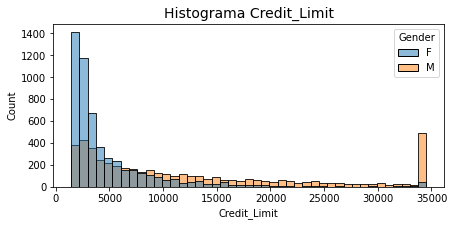

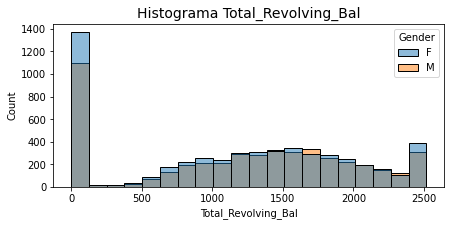

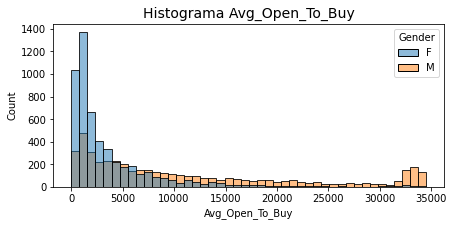

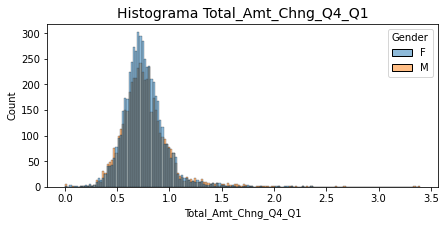

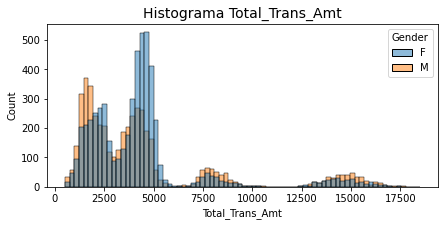

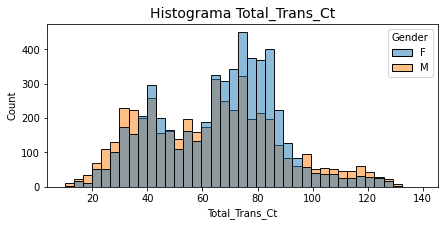

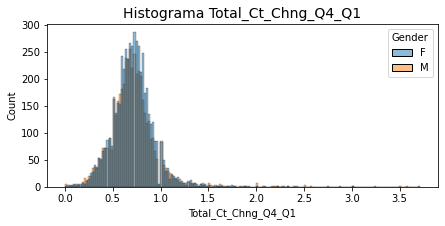

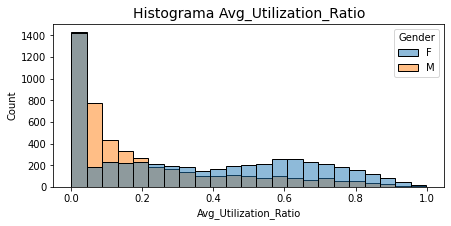

In [41]:
var_numericas = df.select_dtypes(exclude='category').columns

for var in var_numericas:
  plt.figure(figsize=(7,3))
  plt.title(f'Histograma {var}',fontsize=14)
  sns.histplot(df,x=var,hue='Gender')
  plt.show()
  print(' ')

**Boxplots Variables Numericas Categorizadas por variable objetivo (Attrition_Flag) y por Genero**

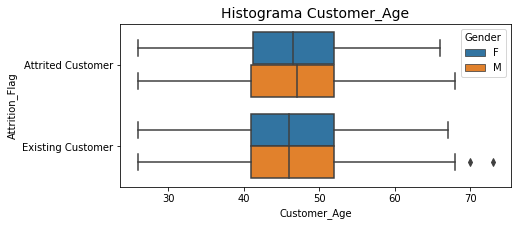

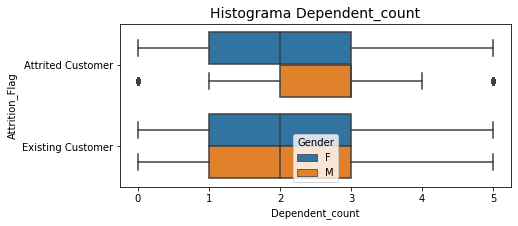

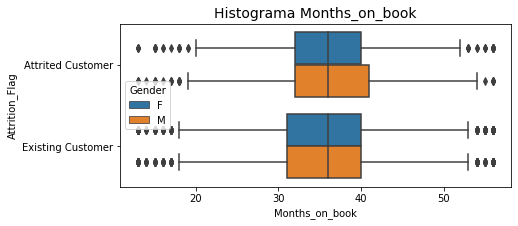

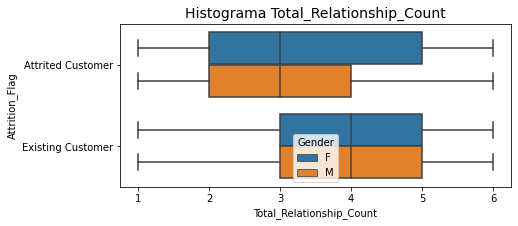

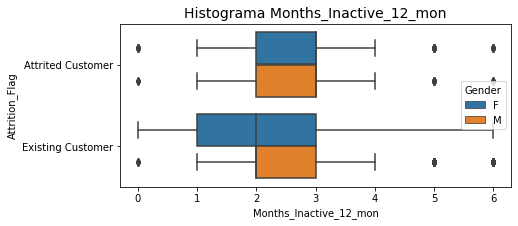

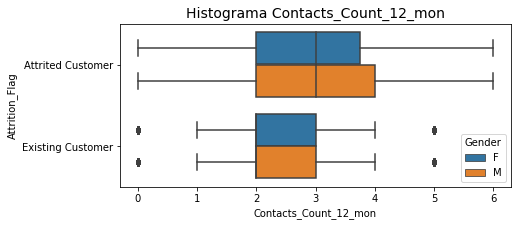

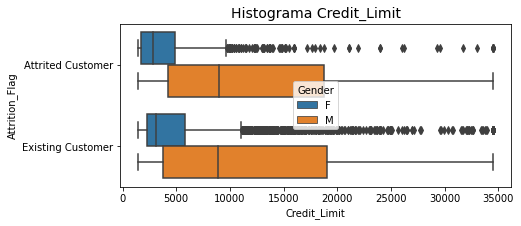

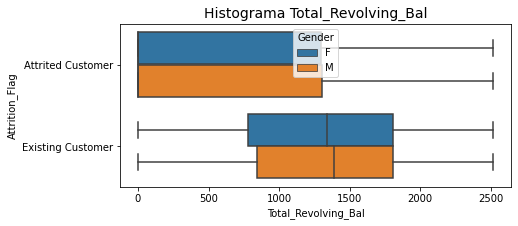

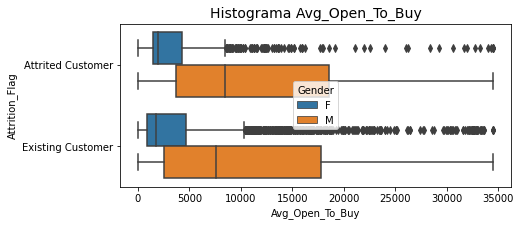

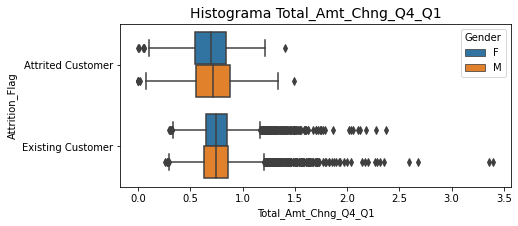

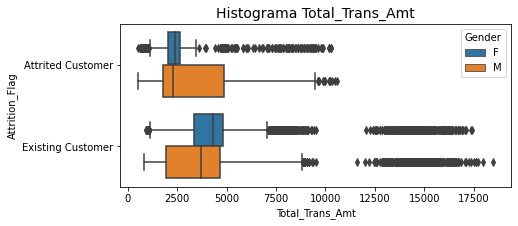

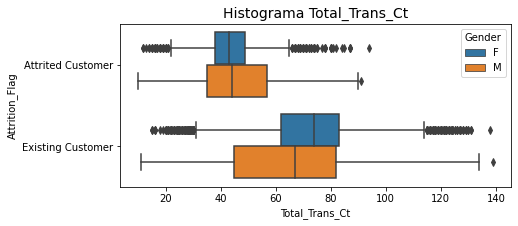

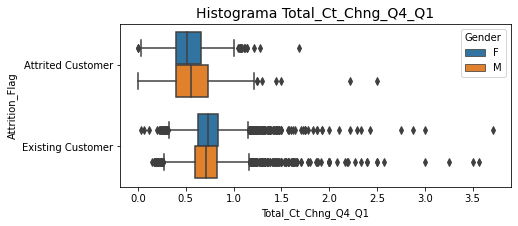

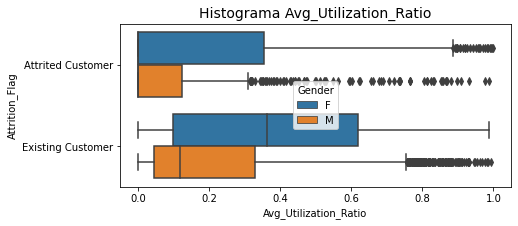

In [42]:
for var in var_numericas:
  plt.figure(figsize=(7,3))
  plt.title(f'Histograma {var}',fontsize=14)
  sns.boxplot(x=df[var],y=df['Attrition_Flag'],hue=df['Gender'])
  plt.show()
  print(' ')

## **Preparación de los Datos**

In [43]:
df.head(4)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760


**Modificación las variables categoricas**

In [44]:
# Existing Customer = 1
# Attrited Customer	= 0
df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Existing Customer':1,'Attrited Customer':0})

# Male = 1
# Feamle = 0
df['Gender'] = df['Gender'].replace({'M':1,'F':0})

# High School = 9 - Graduate = 11 - Uneducated = 0 - Unknown = 0 - College = 14 - Post-Graduate = 17 - Doctorate = 20

df['Education_Level'] = df['Education_Level'].replace({'High School':9,
                                                       'Graduate':11,
                                                       'Uneducated':0,
                                                       'Unknown':0,
                                                       'College':14,
                                                       'Post-Graduate':17,
                                                       'Doctorate':20})

df['Education_Level'] = df['Education_Level'].astype('int')

# Married = 1
# Single = 0
# Divorced = 0
# Uknown = 0
df['Marital_Status'] = df['Marital_Status'].replace({'Married':1,'Single':0,'Divorced':0,
                                                     'Unknown':0})



In [45]:
df = df.drop(columns=['Income_Category','Card_Category'])

In [46]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,9,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,11,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,11,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,9,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,0,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


**Se crean las matrices para el modelo**

In [47]:
y = df['Attrition_Flag']
X = df.drop(columns=['Attrition_Flag']) 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=712)

In [48]:
param_grid = {'criterion':['gini', 'entropy',],
              'splitter': ['best', 'random'],
              'max_depth':[5,10,15]}

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid)  
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)


{'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}


In [49]:
clf = DecisionTreeClassifier(random_state=0,**grid_search.best_params_)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       458
           1       0.96      0.96      0.96      2581

    accuracy                           0.94      3039
   macro avg       0.87      0.88      0.88      3039
weighted avg       0.94      0.94      0.94      3039



[[ 368   90]
 [ 104 2477]]


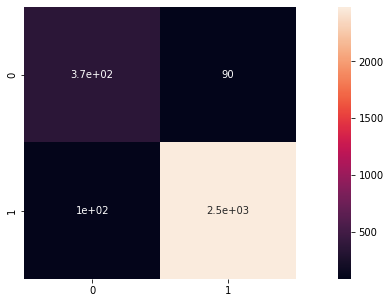

In [50]:
plt.figure(figsize=(15,5))
matriz = confusion_matrix(y_test,y_pred)
sns.heatmap(matriz,annot=True,square=True)
print(matriz)

In [51]:
df.to_csv('datos_modelo.csv',index=False)

In [52]:
clf_pickle = open("clf_tree.pickle","wb")
pkl.dump(clf,clf_pickle) 
clf_pickle.close()   

In [54]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,9,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,11,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,11,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,9,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,0,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,11,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,1,2,0,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,0,1,9,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,1,2,11,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [68]:
import numpy as np
clf.predict_proba([np.array([1 for i in range(17)]).reshape(1,-1)][0])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1., 0.])

In [66]:
np.array([1 for i in range(16)]).reshape(1,-1)[0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

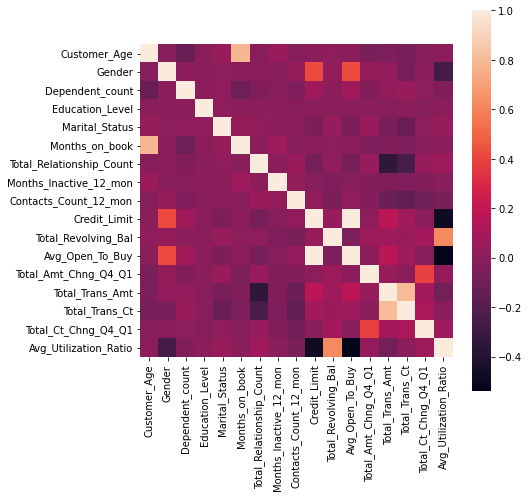

<Figure size 432x288 with 0 Axes>

In [75]:
plt.figure(figsize=(7,7))
sns.heatmap(df[X_train.columns].corr(),square=True)
plt.show()
plt.savefig('Heatmap')